In [1]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# params
N = 1000
F = N
size=100

In [3]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (4,8))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator2(F, size, cor, (8,16), (1,1))

In [4]:
%%timeit
fg = gamma_wrapper(0)

38.6 ms ± 9.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

87.5 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
fm = mn_wrapper(0)


68.9 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

69.7 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

calc(gamma_wrapper, 0.5)

(0.4640178957087245, 1144434.4655493123)

In [9]:
cor_rng = np.arange(0, 1.01, 0.05)

In [10]:
%%time
repeats = 100
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga, l_ga= calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga, l_ga))

CPU times: user 8min 10s, sys: 5min 59s, total: 14min 10s
Wall time: 4min 34s


In [11]:
%%time
repeats = 100
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn, l_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn, l_mn))

CPU times: user 7min 51s, sys: 5min 31s, total: 13min 23s
Wall time: 4min 19s


In [12]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual', 'load'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual', 'load'])

In [13]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})

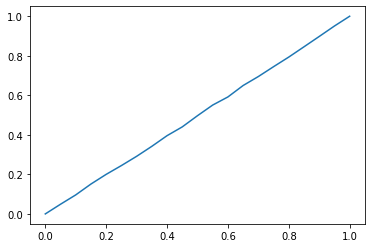

In [14]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

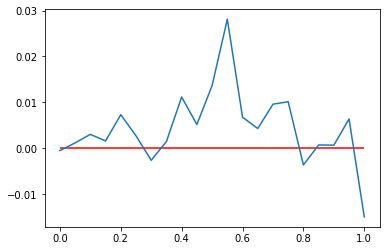

In [15]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, (grped.load['mean']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

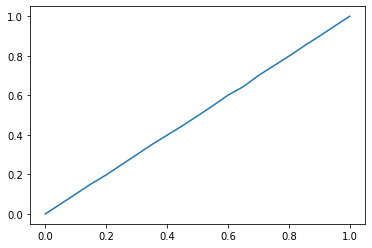

In [16]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

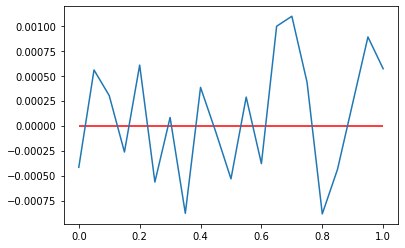

In [17]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, (mnped.load['mean']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

In [18]:
grped

actual                              load                    
              mean count           std          mean count           std
expected                                                                
0.00      0.000230   100  1.525918e-04  1.199348e+06   100   7394.803665
0.05      0.049200   100  7.248115e-03  1.201368e+06   100  18695.648666
0.10      0.096390   100  1.304195e-02  1.203602e+06   100  26475.330241
0.15      0.151352   100  2.014784e-02  1.201878e+06   100  31206.760277
0.20      0.200268   100  2.786423e-02  1.208753e+06   100  34937.225391
0.25      0.244735   100  2.839693e-02  1.203213e+06   100  45918.251272
0.30      0.291491   100  3.441994e-02  1.196808e+06   100  49351.028969
0.35      0.342047   100  3.553602e-02  1.201733e+06   100  46037.830486
0.40      0.395926   100  3.786166e-02  1.213374e+06   100  51305.360077
0.45      0.440408   100  3.786795e-02  1.206182e+06   100  45887.965845
0.50      0.496952   100  4.105507e-02  1.216378e+06   100  53682.630615
0.55      0.550825   100  4.669071e-02  1.233737e+06   100  69961.730193
0.60      0.591864   100  4.352754e-02  1.208094e+06   100  70005.697444
0.65      0.649672   100  4.641477e-02  1.205133e+06   100  69122.502031
0.70      0.695077   100  3.924471e-02  1.211501e+06   100  72576.595259
0.75      0.744877   100  3.713087e-02  1.212141e+06   100  67551.525042
0.80      0.793576   100  3.426680e-02  1.195593e+06   100  73467.258288
0.85      0.845495   100  2.939458e-02  1.200830e+06   100  84004.644412
0.90      0.897758   100  2.299028e-02  1.200767e+06   100  87590.656953
0.95      0.950580   100  1.065434e-02  1.207625e+06   100  85929.537781
1.00      1.000000   100  2.472696e-09  1.181989e+06   100  89141.256848

In [19]:
mnped

actual                              load                    
              mean count           std          mean count           std
expected                                                                
0.00      0.000240   100  1.434289e-04  1.199499e+06   100   7182.823628
0.05      0.050369   100  7.212490e-03  1.200669e+06   100   7005.679116
0.10      0.100771   100  1.198701e-02  1.200361e+06   100   9046.793010
0.15      0.151721   100  1.862546e-02  1.199683e+06   100   7506.763279
0.20      0.197591   100  2.079771e-02  1.200727e+06   100   8113.836545
0.25      0.248738   100  2.725881e-02  1.199323e+06   100   8878.759579
0.30      0.299668   100  2.971217e-02  1.200098e+06   100   9492.203814
0.35      0.350977   100  3.320090e-02  1.198947e+06   100  10271.318243
0.40      0.398332   100  3.150789e-02  1.200460e+06   100  10771.093161
0.45      0.445432   100  3.543625e-02  1.199925e+06   100   8588.515403
0.50      0.495605   100  3.850353e-02  1.199361e+06   100  10701.775958
0.55      0.546914   100  3.677511e-02  1.200342e+06   100   9958.564490
0.60      0.600712   100  3.707671e-02  1.199543e+06   100  11396.011011
0.65      0.643276   100  3.220784e-02  1.201194e+06   100  11708.719339
0.70      0.700088   100  3.082017e-02  1.201314e+06   100  11763.983866
0.75      0.748615   100  2.507621e-02  1.200520e+06   100  11662.665842
0.80      0.797732   100  2.696068e-02  1.198939e+06   100  11161.756465
0.85      0.849420   100  1.955492e-02  1.199475e+06   100  13563.180042
0.90      0.898697   100  1.318390e-02  1.200271e+06   100  13084.672667
0.95      0.949551   100  7.382610e-03  1.201065e+06   100  12668.350319
1.00      1.000000   100  1.289727e-09  1.200683e+06   100  12713.179785